In [4]:
## Basic principles of Fourier Transformation.

Text(0.5, 1.0, 'Spoken word "Dog", Sampling Rate: 22050')

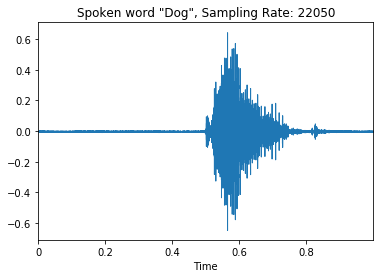

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

filename = 'Haunting_song_of_humpback_whales.wav'
filename = 'ffbb695d_nohash_0.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr)
plt.title('Spoken word "Dog", Sampling Rate: '+str(sr))

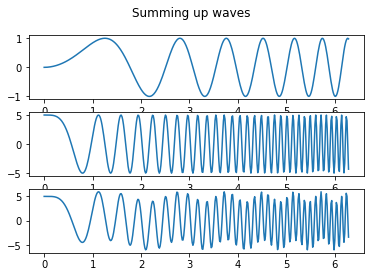

In [11]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
y2 = 5*np.cos(5*x ** 2)
fig, axs = plt.subplots(3)
fig.suptitle('Summing up waves')
axs[0].plot(x, y)
axs[1].plot(x, y2)
axs[2].plot(x, y+y2)

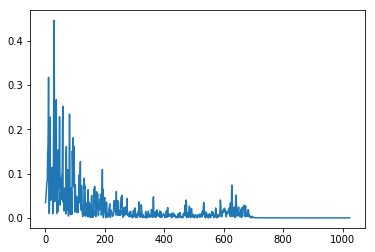

In [5]:

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
plt.plot(D);

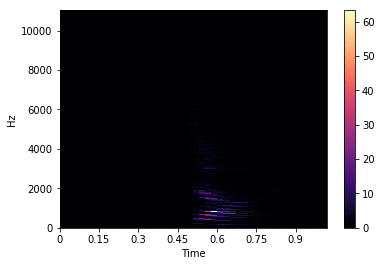

In [6]:
import matplotlib.pyplot as plt
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  
                        hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

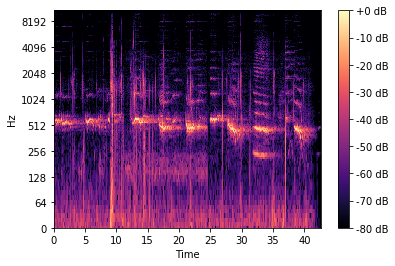

In [15]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [17]:
### Mel Scale

In [18]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

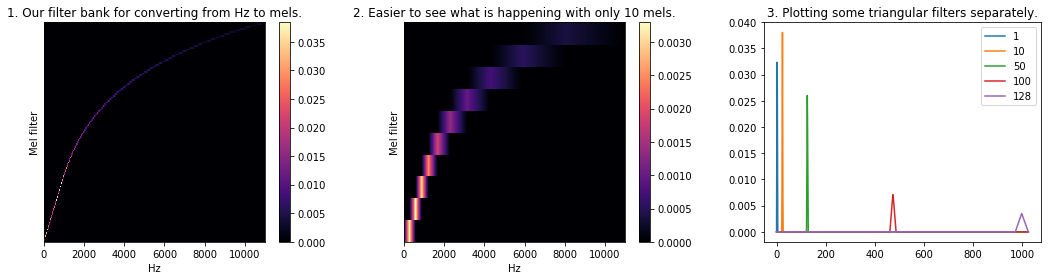

In [19]:
plt.figure(figsize=(15, 4));plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, 
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, 
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');plt.tight_layout();

In [21]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

In [22]:
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

The Mel Spectrogram is the result of the following pipeline:
<br>
- Separate to windows: Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.
- Compute FFT (Fast Fourier Transform) for each window to transform from time domain to frequency domain.
- Generate a Mel scale: Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.
- And what do we mean by evenly spaced? not by distance on the frequency dimension, but distance as it is heard by the human ear.
- Generate Spectrogram: For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.

In [24]:
# Sanity check that indeed we understood the underlying pipeline
S = librosa.feature.melspectrogram(whale_song, 
                                    sr=sr, 
                                    n_fft=n_fft, 
                                    hop_length=hop_length, 
                                    n_mels=n_mels)

fft_windows = librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()

Source: https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0